In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [7]:
print(df.at[6, 'v2'])

Even my brother is not like to speak with me. They treat me like aids patent.


In [5]:
df.shape

(5572, 5)

In [6]:
#Data Cleaning
#EDA
#Text preprocessing
#Model building
#Evaluation
#Improvement
#Website
#deploy

In [7]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<Axes: >

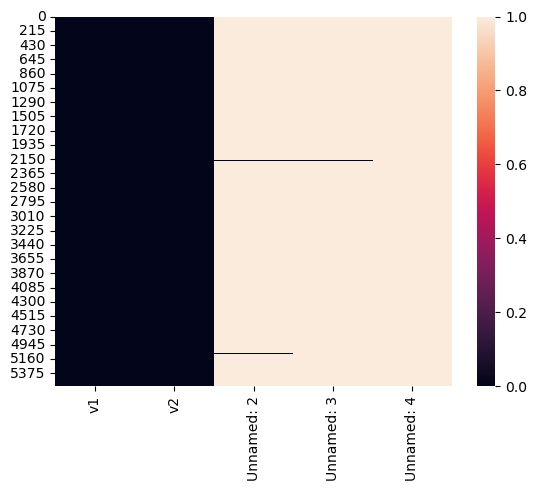

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [10]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [11]:
df = df.rename(columns= {'v1': 'target', 'v2': 'text'})

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

EDA 

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

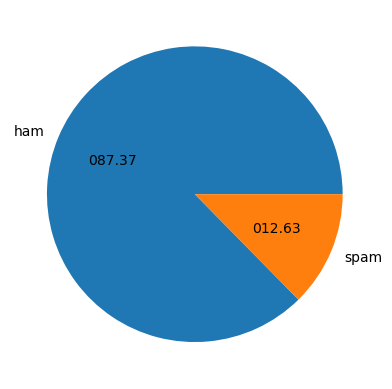

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "0%.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_charecters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# Num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#break by sentences

In [29]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [30]:
df[['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [31]:
# Ham and spam different analysis
df[df['target']==0][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [32]:
#spam different analysis
df[df['target']==1][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

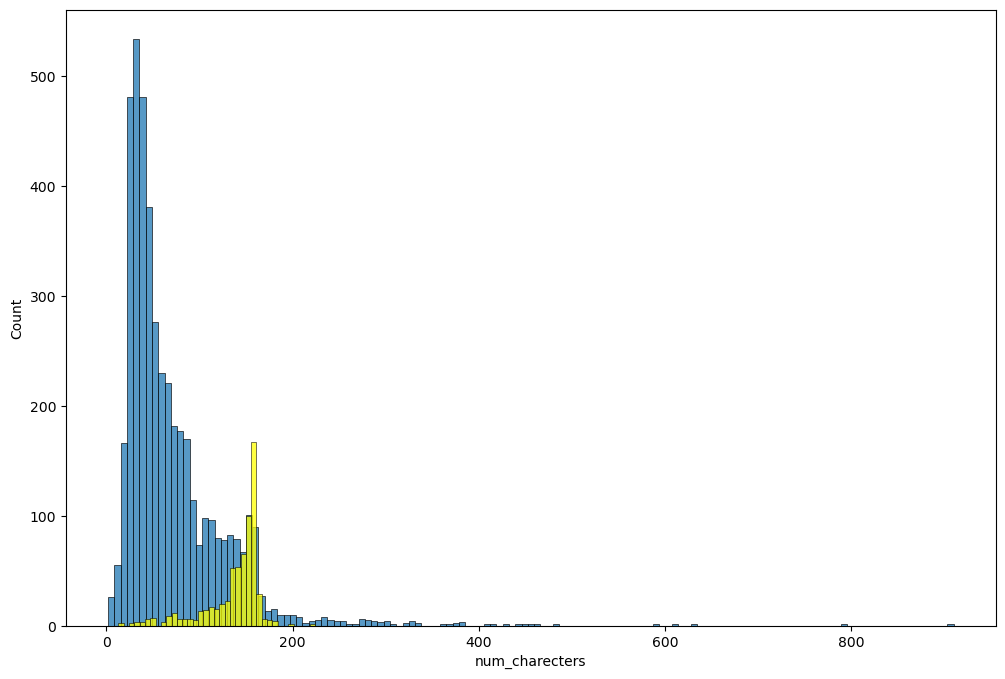

In [33]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['target']==0]['num_charecters'])#ham
sns.histplot(df[df['target']==1]['num_charecters'], color = 'yellow')#spam

<Axes: xlabel='num_words', ylabel='Count'>

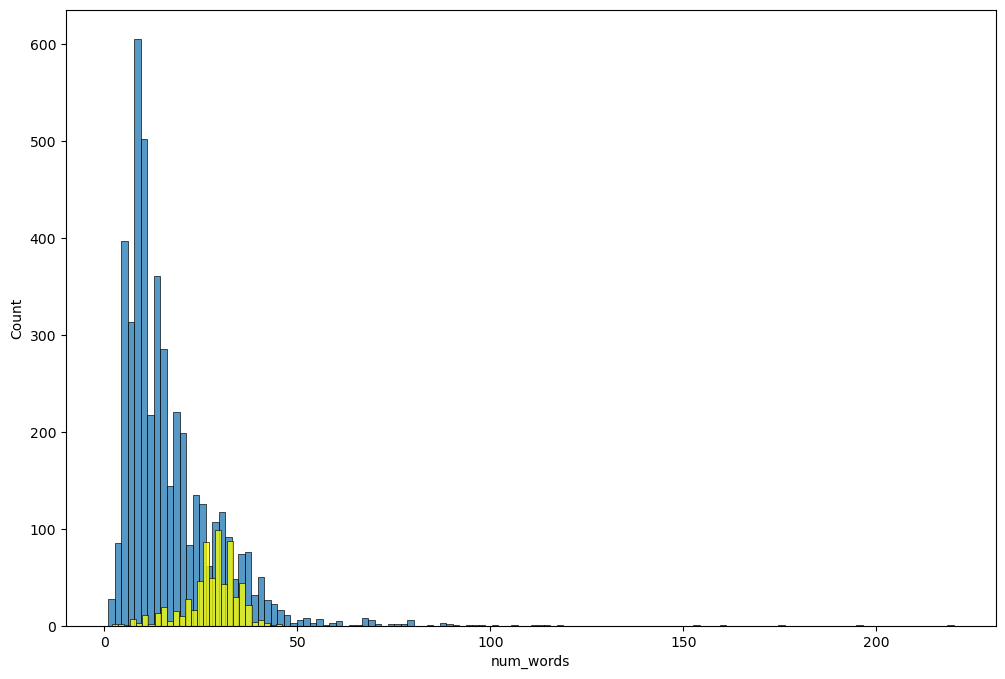

In [34]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['target']==0]['num_words'])#ham
sns.histplot(df[df['target']==1]['num_words'], color = 'yellow')#spam

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


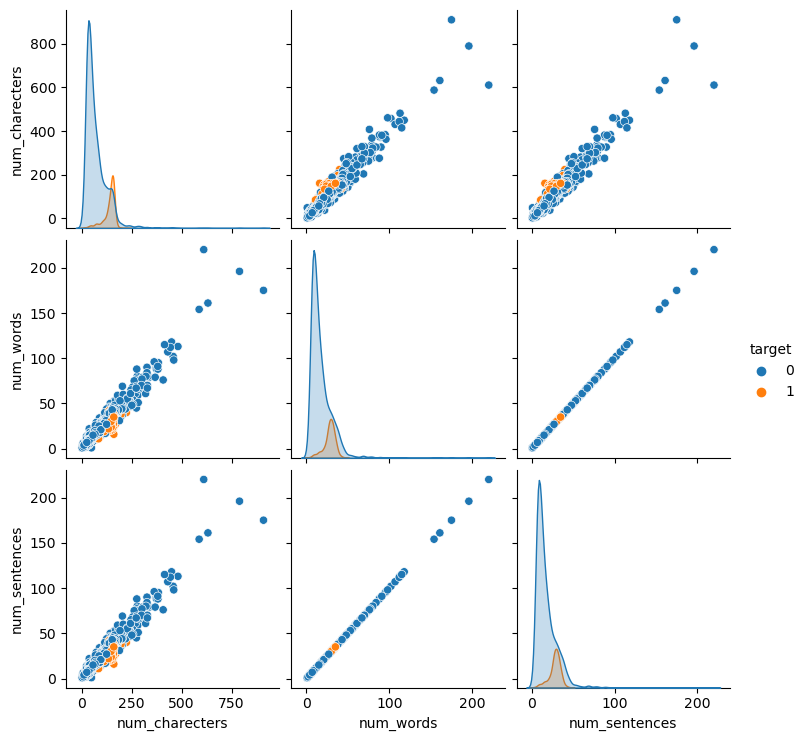

In [35]:
sns.pairplot(df, hue = 'target')

<Axes: >

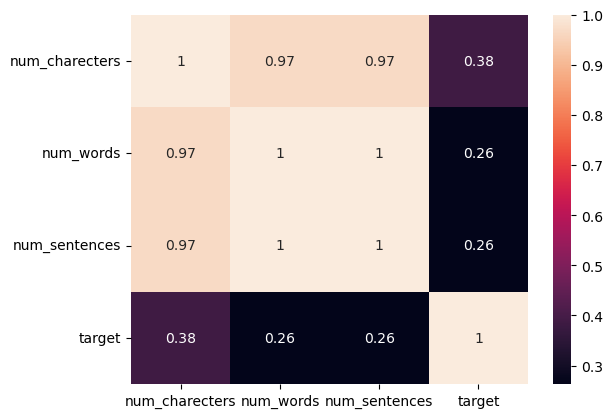

In [36]:
sns.heatmap(df[['num_charecters',	'num_words',	'num_sentences', 'target']].corr(), annot = True)

In [37]:
# ######## Data preprocessing
# 1 Lowercase
# 2 Tokenization
# 3 removing special charecters
# 4 Removing stop words and punctiation
# 5 Stremming
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)
    


In [39]:
print(transform_text("Hi how are you Rashid!. do you like playing chess?"))

hi rashid like play chess


In [40]:
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
###### Extract the spam words
spam_corpus = []
for msg in df[df['target'] ==  1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
len(spam_corpus)

In [ ]:
######### Counting the most common words maximum
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

In [ ]:
ham_corpus = []
for msg in df[df['target'] ==  0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
len(ham_corpus)

In [ ]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

In [ ]:
#### Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ###Bag of Words
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer ### TF IDF
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

In [ ]:
#### The data is imbalanced so we need to ensure the model with good precision score
# we will use tfidf----------> MNB

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [ ]:
df.head(10)